<a href="https://colab.research.google.com/github/AburizalAN/learn-ml/blob/master/04_pytorch_project_aburizal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Pytorch


**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Student Identity


In [ ]:
# @title #### Student Identity
student_id = "REAEAYH8" # @param {type:"string"}
name = "Aburizal Adi Nugroho" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1pRIbA2Zphrtg_TS5N0ypHHTXkUBs50tI?usp=sharing"  # @param {type:"string"}

assignment_id = "00_pytorch_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this project, you will use what you learn to create your own Deep Learning model. We'll use a variety of datasets, each with different data types such as images, text, and numerical/categorical data. Your task is to choose one of these datasets and build a deep learning model upon it.


## Datasets

Choose one from the following datasets for your project:

1. **Digits Dataset**: A simplified version of MNIST containing 8x8 images of hand-written digits. [Dataset Link](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)
2. **Dogs vs. Cats Dataset from Kaggle**: A sizable dataset of 25,000 images with equal representation of dogs and cats. [Dataset Link](https://www.kaggle.com/c/dogs-vs-cats)
3. **Breast Cancer Wisconsin (Diagnostic) Dataset**: Computed features from a digitized image of a fine needle aspirate (FNA) of a breast mass. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
4. **Spam Text Message Classification Dataset**: A collection of labeled SMS messages, categorized as "spam" or "ham". [Dataset Link](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
5. **German Credit Risk Dataset**: People's data categorized by various attributes to predict credit risk. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)


## Grading Scheme

Your work will be evaluated based on both accuracy and loss value:

100: The model has an accuracy of more than 80% and a Loss Value of less than 0.2. This model is excellent and demonstrates a strong understanding of the task.

90: The model has an accuracy between 70% - 79% and a Loss Value between 0.2 - 0.3. This model is very good, with some room for improvement.

80: The model has an accuracy between 60% - 69% and a Loss Value between 0.3 - 0.4. This model is fairly good but needs improvement in balancing accuracy and loss value.

70: The model has an accuracy between 50% - 59% and a Loss Value between 0.4 - 0.5. This model is below average and needs significant improvement.

60 or below: The model has an accuracy of less than 50% or a Loss Value of more than 0.5, or the student did not submit the accuracy and Loss Value. This model is poor and needs considerable improvement.


Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Let's start your deep learning journey! Choose your dataset and delve into the project! Happy modeling!


## Project Structure

Your project should be organized into five main sections.


### 1. Package and Module Installation

First, let's pool all package and module that you'll need in the installation section below.


In [1]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
import pandas as pd
import numpy as numpy
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


### 2. Data Loading and Preprocessing

Load the chosen dataset and preprocess it for deep learning.


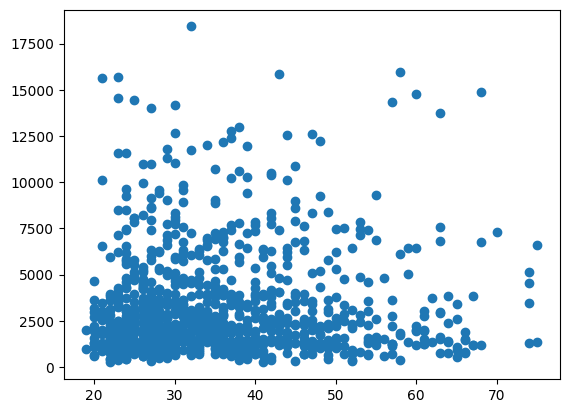

In [9]:
# Write your preprocessing here
# pd.set_option("display.max_rows", 1000)
# pd.set_option('display.max_columns', 500)

column_names = [
    "status",  # Status of existing checking account
    "duration", # Month
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account_bonds", # Saving Account/Bonds
    "present_employment", # Present Employment since
    "installment_rate", # Installment rate in percentage of disposable income
    "personal_status", # Personal Status & Sex
    "other_debtors_guarantors", # other debtors / guarantors
    "present_residence", # Present residence since
    "property",
    "age", # years
    "other_installment_plans", # Other installment plans
    "housing",
    "existing_credits", # Number of existing credits at this bank
    "job",
    "LPM", # Number of people being liable to provide maintenance for
    "telephone",
    "foreign_worker",
    "class"
]
df = pd.read_csv(
    "./datasets/credit_data/german.data",
    delim_whitespace=True,
    names=column_names,
    index_col=False
)

# print(df.groupby("age")["class"].count())

plt.scatter(df["age"], df["credit_amount"])

x_filtered = df[[
  "credit_history",
  "credit_amount",
  "duration",
  "status",
  "savings_account_bonds",
  "present_employment",
  "installment_rate",
  "personal_status",
  "existing_credits",
  "age",
  "class",
]]

def replace_credit_history(data):
  label = {
    "A30": 1,
    "A31": 2,
    "A32": 3,
    "A33": 4,
    "A34": 5,
  }
  return label.get(data, data)

def replace_status(data):
  label = {
    "A11": 1,
    "A12": 2,
    "A13": 3,
    "A14": 4,
  }
  return label.get(data, data)

def replace_savings_account_bonds(data):
  label = {
    "A61": 1,
    "A62": 2,
    "A63": 3,
    "A64": 4,
    "A65": 5,
  }
  return label.get(data, data)

def replace_present_employement(data):
  label = {
    "A71": 1,
    "A72": 2,
    "A73": 3,
    "A74": 4,
    "A75": 5,
  }
  return label.get(data, data)

def replace_purpose(data):
  label = {
    "A40" : 1,
    "A41" : 2,
    "A42" : 3,
    "A43" : 4,
    "A44" : 5,
    "A45" : 6,
    "A46" : 7,
    "A47" : 8,
    "A48" : 9,
    "A49" : 10,
    "A410" : 11
  }
  return label.get(data, data)

# label encoding column credit_history, status, savings_account_bonds, and present_employment
x_filtered.loc[:, "credit_history"] = x_filtered["credit_history"].apply(replace_credit_history)
x_filtered.loc[:, "status"] = x_filtered["status"].apply(replace_status)
x_filtered.loc[:, "savings_account_bonds"] = x_filtered["savings_account_bonds"].apply(replace_savings_account_bonds)
x_filtered.loc[:, "present_employment"] = x_filtered["present_employment"].apply(replace_present_employement)
# x_filtered.loc[:, "purpose"] = x_filtered["purpose"].apply(replace_purpose)

# One Hot Encoding column personal_status
personal_status_encoded = pd.get_dummies(data=x_filtered["personal_status"], dtype="int")
x_filtered = pd.concat([x_filtered, personal_status_encoded], axis=1)

# job_encoded = pd.get_dummies(data=x_filtered["job"], dtype="int")
# x_filtered = pd.concat([x_filtered, job_encoded], axis=1)

# purpose_encoded = pd.get_dummies(data=x_filtered["purpose"], dtype="int")
# x_filtered = pd.concat([x_filtered, purpose_encoded], axis=1)

# housing_encoded = pd.get_dummies(data=x_filtered["housing"], dtype="int")
# x_filtered = pd.concat([x_filtered, housing_encoded], axis=1)

x_filtered.drop(columns=["personal_status"], inplace=True)

# Standardize column credit_amount
x_filtered["credit_amount"] = (x_filtered["credit_amount"] - x_filtered["credit_amount"].mean()) / x_filtered["credit_amount"].std()

processed_df = x_filtered
processed_df = processed_df.astype("float32")
# Load your data
# processed_df

### 3. Model Building

Define your deep learning model's architecture.


In [117]:
# Write your code here for Model Building here

# define your Deep Learning Model here, training is in the next section.

class Model(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super().__init__()
    self.layer_1 = torch.nn.Linear(n_feature, n_hidden)
    self.layer_2 = torch.nn.Linear(n_hidden, n_output)
    # self.double()

  def forward(self, x):
    return self.layer_2(torch.sigmoid(self.layer_1(x)))


### 4. Model Training

Train your model and evaluate its performance using validation data.


c:\Users\aburi\Documents\AburizalAN\venv\venv_3.11\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\aburi\Documents\AburizalAN\venv\venv_3.11\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


prediction 0 tensor([1.2984], grad_fn=<SelectBackward0>) 2.0


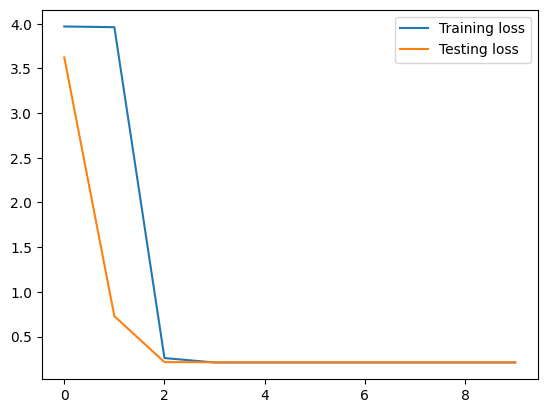

In [23]:
# Write your code here for Model Training here
class Model(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.layer_1 = torch.nn.Linear(n_feature, n_hidden)
        self.layer_2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        return self.layer_2(torch.sigmoid(self.layer_1(x)))
    

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

x = processed_df.drop(columns=["class"])
y = processed_df.loc[:, "class"]
x_tensor = torch.tensor(x.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

torch.manual_seed(0)

# Split data into training and testing randomly
indices = torch.randperm(x_tensor.size(0))
x_train = torch.index_select(x_tensor, dim=0, index=indices[:800])
y_train = torch.index_select(y_tensor, dim=0, index=indices[:800])
x_test = torch.index_select(x_tensor, dim=0, index=indices[800:])
y_test = torch.index_select(y_tensor, dim=0, index=indices[800:])


model = Model(n_feature=x_train.size(1), n_hidden=10, n_output=1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

training_losses = []
testing_losses = []

prediction = None
test_prediction = None

correct = 0

for i in range(20):
  model.train()

  prediction = model(x_train)
  loss = loss_func(prediction, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  correct += (prediction == y_train).float().sum()
  print("correct ", correct)

  if i % 2 == 0:
    model.eval()
    with torch.inference_mode():
      test_prediction = model(x_test)
      test_loss = loss_func(test_prediction, y_test)

      training_losses.append(loss.data.numpy())
      testing_losses.append(test_loss.data.numpy())

plt.plot(training_losses, label='Training loss')
plt.plot(testing_losses, label='Testing loss')
plt.legend()
plt.show()


# dl_loss_value = 1

#define the iteration

#create the training loop


### 5. Model Evaluation

Evaluate your model's performance on the test data using the grading scheme defined above.


In [ ]:
# Write your code here for Model Evaluation here
dl_accuracy = 0

#define the iteration

#create the training loop


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [ ]:
# Submit Method

# Do not change the code below
question_id = "01_dl_project_accuracy"
submit(student_id, name, assignment_id, str(dl_accuracy), question_id, drive_link)
question_id = "02_dl_project_loss_value"
submit(student_id, name, assignment_id, str(dl_loss_value), question_id, drive_link)

## FIN
